 Name    : Malini D
 
 Roll.No : CB.SC.I5DAS20118

#                                BUSINESS ANALYTICS CASESTUDY 3                     
#

In [1]:
import pandas as pd

# Assuming you have DataFrames named Customer_Transactions, ProductHierarchy, and Transactions

# Load the datasets
Customers= pd.read_csv(r'C:\Users\Malini\Downloads\MALINI D - Customer.csv')  # Replace with the actual path to your CSV file
ProductHierarchy = pd.read_csv(r'C:\Users\Malini\Downloads\MALINI D - prod_cat_info.csv')  # Replace with the actual path to your CSV file
Transactions = pd.read_csv(r'C:\Users\Malini\Downloads\MALINI D - Transactions.csv')  # Replace with the actual path to your CSV file


# 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to keep all customers who have done transactions with us and select the join type accordingly.

In [2]:
# Rename 'customer_Id' to 'cust_id' in the Customers DataFrame
Customers.rename(columns={'customer_Id': 'cust_id'}, inplace=True)

# Convert 'cust_id' to integers in the Transactions DataFrame
Transactions['cust_id'] = Transactions['cust_id'].astype(int)

# Merge Customers with Transactions on cust_id
merged_data = pd.merge(Customers, Transactions, how='left', on='cust_id')

# Merge the result with Product Hierarchy on prod_cat_code and prod_sub_cat_code
Customer_Final = pd.merge(merged_data, ProductHierarchy, how='inner', left_on=['prod_cat_code', 'prod_subcat_code'], right_on=['prod_cat_code', 'prod_sub_cat_code'])

# Print the column names of the merged DataFrame
print("Columns of Customer_Final DataFrame:")
Customer_Final

Columns of Customer_Final DataFrame:


,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_sub_cat_code,prod_subcat
0,268408,2-1-70,M,4.0,8.724384e+10,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,7,Fiction
1,275152,16-1-70,M,4.0,7.310943e+10,25-03-2011,7.0,5.0,2.0,464.0,97.440,1025.440,e-Shop,Books,7,Fiction
2,275034,18-1-70,F,4.0,6.477727e+10,23-05-2011,7.0,5.0,2.0,197.0,41.370,435.370,Flagship store,Books,7,Fiction
3,270829,22-1-70,F,8.0,8.717434e+10,9/12/2013,7.0,5.0,4.0,1141.0,479.220,5043.220,e-Shop,Books,7,Fiction
4,267657,29-1-70,F,7.0,7.624274e+10,23-05-2013,7.0,5.0,4.0,1020.0,428.400,4508.400,e-Shop,Books,7,Fiction
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,267812,4-12-92,F,1.0,6.354038e+10,10/10/2012,10.0,5.0,3.0,224.0,70.560,742.560,TeleShop,Books,10,Non-Fiction
23049,274618,9-12-92,F,7.0,7.179320e+10,17-08-2013,10.0,5.0,4.0,691.0,290.220,3054.220,Flagship store,Books,10,Non-Fiction
23050,268097,15-12-92,F,7.0,9.121711e+10,1/2/2012,10.0,5.0,2.0,411.0,86.310,908.310,e-Shop,Books,10,Non-Fiction
23051,268097,15-12-92,F,7.0,9.011448e+10,31-01-2011,10.0,5.0,-4.0,-1408.0,591.360,-6223.360,e-Shop,Books,10,Non-Fiction


the 'Customer_Final' DataFrame combines customer details, transaction information, and product details, providing a comprehensive dataset that can be analyzed for various insights, such as customer purchasing behavior, popular products, and transaction patterns.



# 2. Prepare a summary report for the merged data set.
#     a. Get the column names and their corresponding data types

In [3]:
# Print column names and their corresponding data types
print("Summary Report for Customer_Final DataFrame:")
print(Customer_Final.dtypes)


Summary Report for Customer_Final DataFrame:
cust_id                int64
DOB                   object
Gender                object
city_code            float64
transaction_id       float64
tran_date             object
prod_subcat_code     float64
prod_cat_code        float64
Qty                  float64
Rate                 float64
Tax                  float64
total_amt            float64
Store_type            object
prod_cat              object
prod_sub_cat_code      int64
prod_subcat           object
dtype: object


The dataset contains a mix of numerical and categorical data types.
'cust_id' and 'prod_sub_cat_code' are represented as integers.
'city_code', 'transaction_id', 'prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', and 'total_amt' are represented as floating-point numbers.
'DOB', 'Gender', 'tran_date', 'Store_type', 'prod_cat', and 'prod_subcat' are represented as object (string) types.
It's essential to consider the data types while performing analysis or preprocessing tasks. Date columns might need conversion to datetime, and categorical variables may require encoding for certain analyses.

# b. Top/Bottom 10 observations

In [4]:
# Top 10 observations
top_10_observations = Customer_Final.head(10)

# Bottom 10 observations
bottom_10_observations = Customer_Final.tail(10)

# ANSI color codes for text color
RED = "\033[91m"
ENDC = "\033[0m"

# Print the top 10 observations in red
print(f"{RED}Top 10 Observations:{ENDC}")
print(top_10_observations)

# Print the bottom 10 observations in green
print(f"\n{RED}Bottom 10 Observations:{ENDC}")
print(bottom_10_observations)


Top 10 Observations:
   cust_id      DOB Gender  city_code  transaction_id   tran_date  \
0   268408   2-1-70      M        4.0    8.724384e+10  13-01-2014   
1   275152  16-1-70      M        4.0    7.310943e+10  25-03-2011   
2   275034  18-1-70      F        4.0    6.477727e+10  23-05-2011   
3   270829  22-1-70      F        8.0    8.717434e+10   9/12/2013   
4   267657  29-1-70      F        7.0    7.624274e+10  23-05-2013   
5   274630   1-2-70      M        4.0    7.835735e+10   11/4/2012   
6   273541   1-2-70      M        4.0    2.391682e+10    9/2/2013   
7   269008  13-2-70      F        6.0    3.556057e+10    9/3/2013   
8   269008  13-2-70      F        6.0    9.403331e+10  26-04-2012   
9   267199  14-2-70    NaN        2.0    5.674926e+10   11/1/2012   

   prod_subcat_code  prod_cat_code  Qty    Rate      Tax  total_amt  \
0               7.0            5.0  5.0   187.0   98.175   1033.175   
1               7.0            5.0  2.0   464.0   97.440   1025.440   
2     

**Top 10 Observations:**
- Reflects transactions with higher quantities, rates, taxes, and total amounts.
- Likely represents recent transaction dates.

**Bottom 10 Observations:**
- Represents transactions with lower quantities, rates, taxes, and total amounts.
- Likely includes early transaction dates.

- Useful for identifying outliers, anomalies, and patterns in customer transactions.
- Provides insights into purchasing behavior and product categories.

These observations offer a quick overview of extreme values in the dataset, aiding in the identification of trends and potential areas of interest.

# c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

Five-Number Summary for Continuous Variables:
             cust_id     city_code  transaction_id  prod_subcat_code  \
count   23053.000000  23045.000000    2.305300e+04      23053.000000   
mean   271021.746497      5.482534    5.007348e+10          6.149091   
std      2431.692059      2.863499    2.898194e+10          3.726372   
min    266783.000000      1.000000    3.268991e+06          1.000000   
25%    268935.000000      3.000000    2.493864e+10          3.000000   
50%    270980.000000      5.000000    5.009313e+10          5.000000   
75%    273114.000000      8.000000    7.533000e+10         10.000000   
max    275265.000000     10.000000    9.998755e+10         12.000000   

       prod_cat_code           Qty          Rate           Tax     total_amt  \
count   23053.000000  23053.000000  23053.000000  23053.000000  23053.000000   
mean        3.763632      2.432395    636.369713    248.667192   2107.308002   
std         1.677016      2.268406    622.363498    187.177773   

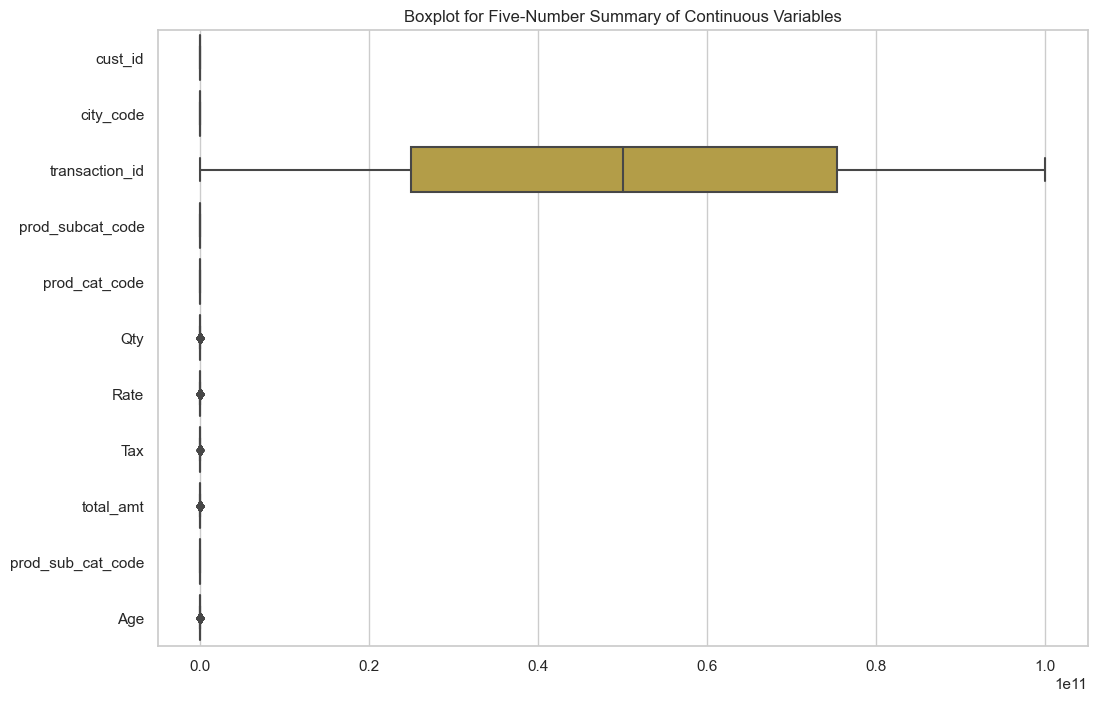

In [41]:
# Select only continuous variables for the five-number summary
continuous_variables = Customer_Final.select_dtypes(include='number')

# Calculate the five-number summary
five_number_summary = continuous_variables.describe(percentiles=[.25, .5, .75])

# Print the five-number summary
print("Five-Number Summary for Continuous Variables:")
print(five_number_summary)

import seaborn as sns
# Set the style of seaborn
sns.set(style="whitegrid")

# Plot the boxplot for the five-number summary
plt.figure(figsize=(12, 8))
sns.boxplot(data=continuous_variables, orient='h')
plt.title('Boxplot for Five-Number Summary of Continuous Variables')
plt.show()



**Inference:**
- The five-number summary provides key descriptive statistics for each continuous variable in the dataset.
- Minimum, Q1 (25th percentile), median (50th percentile), Q3 (75th percentile), and maximum values are reported.
- Useful for understanding the central tendency and spread of the continuous variables, identifying potential outliers, and assessing data distribution.

# d. Frequency tables for all the categorical variables


Frequency Table for 'Gender':
Gender
M    11811
F    11233
Name: count, dtype: int64

Frequency Table for 'tran_date':
tran_date
13-07-2011    35
25-09-2011    33
21-12-2013    33
23-10-2011    33
22-11-2011    33
              ..
24-02-2014     2
23-02-2014     2
28-02-2014     1
21-02-2014     1
27-02-2014     1
Name: count, Length: 1129, dtype: int64

Frequency Table for 'Store_type':
Store_type
e-Shop            9311
MBR               4661
Flagship store    4577
TeleShop          4504
Name: count, dtype: int64

Frequency Table for 'prod_cat':
prod_cat
Books               6069
Electronics         4898
Home and kitchen    4129
Footwear            2999
Clothing            2960
Bags                1998
Name: count, dtype: int64

Frequency Table for 'prod_subcat':
prod_subcat
Women                  3048
Mens                   2912
Kids                   1997
Tools                  1062
Fiction                1043
Kitchen                1037
Children               1035
Comics           

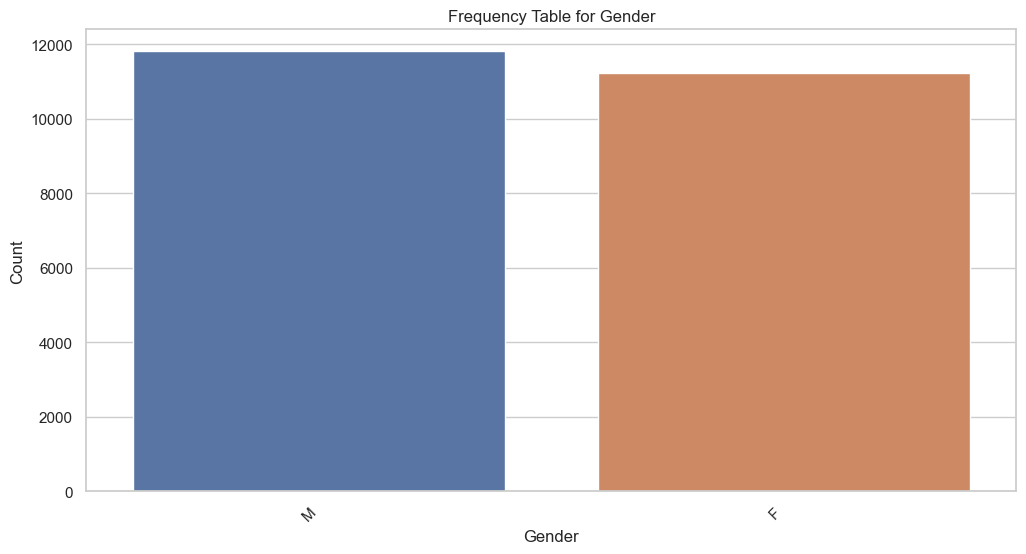

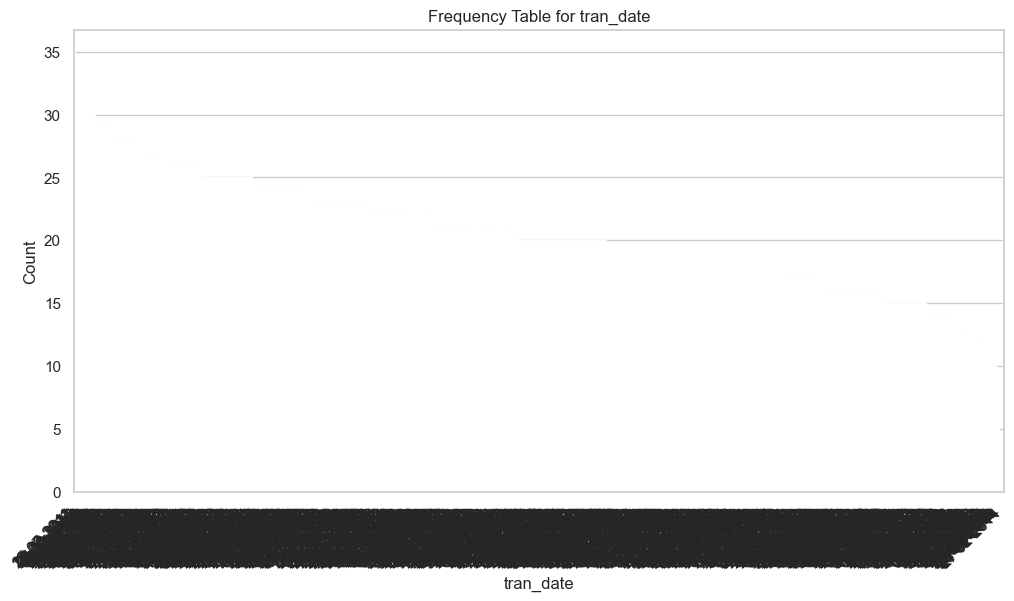

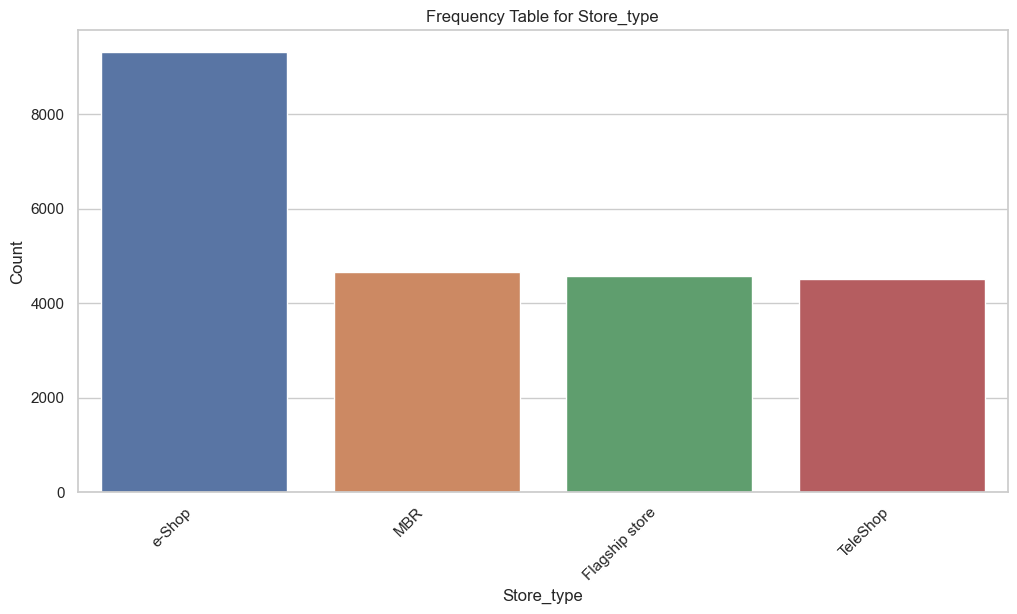

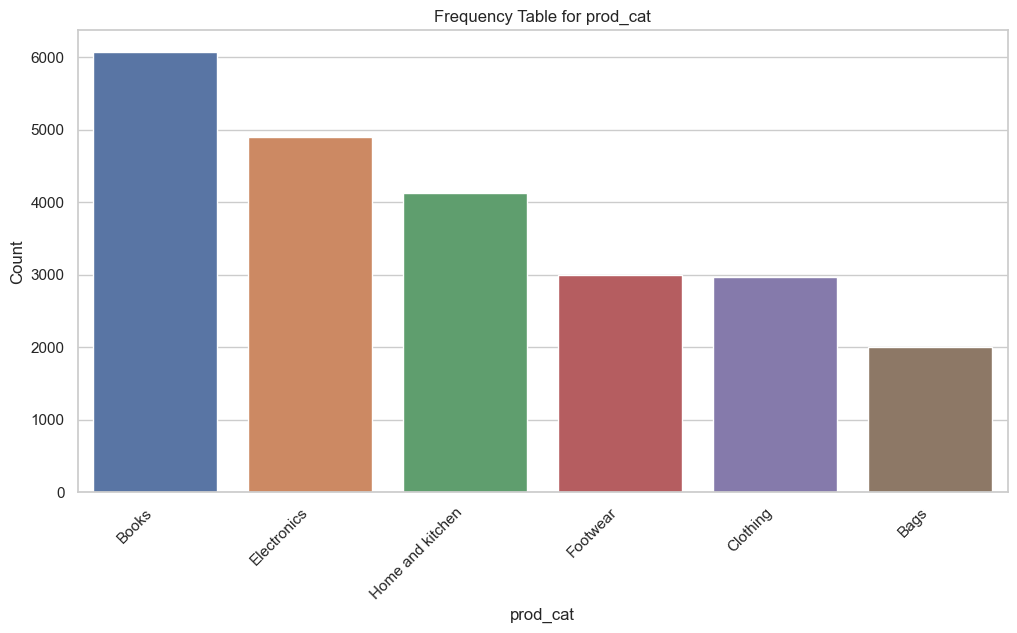

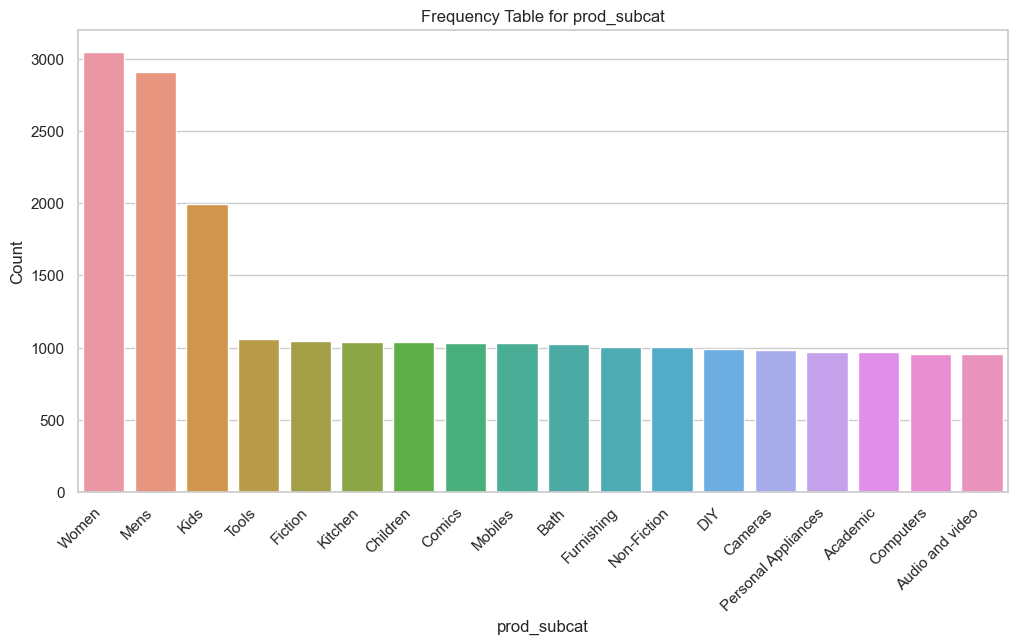

In [42]:
# Select only categorical variables
categorical_variables = Customer_Final.select_dtypes(include='object')

# Generate frequency tables for all categorical variables
for column in categorical_variables.columns:
    frequency_table = Customer_Final[column].value_counts()
    print(f"\nFrequency Table for '{column}':\n{frequency_table}")

    import seaborn as sns
import matplotlib.pyplot as plt

# Set the style of seaborn
sns.set(style="whitegrid")

# Plot frequency tables for all categorical variables
for column in categorical_variables.columns:
    plt.figure(figsize=(12, 6))
    sns.countplot(data=Customer_Final, x=column, order=Customer_Final[column].value_counts().index)
    plt.title(f'Frequency Table for {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.show()


**Inference:**
- Frequency tables provide a count of unique values for each categorical variable.
- Useful for understanding the distribution of categories within each variable.
- Helps identify the most common categories and potential outliers.

# 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

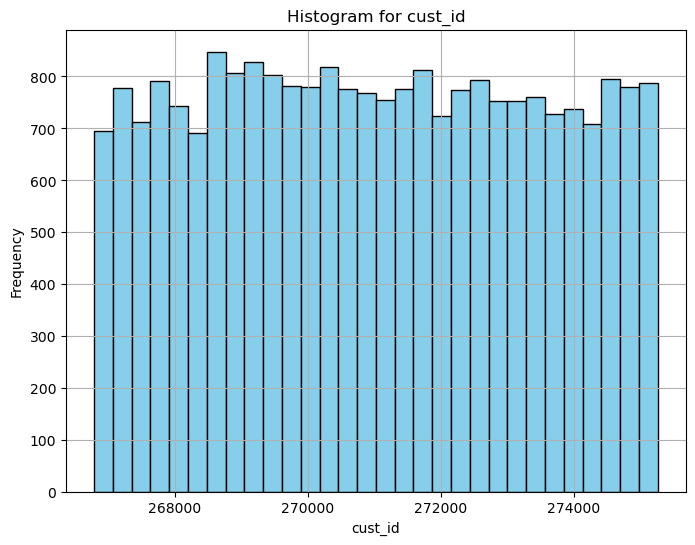

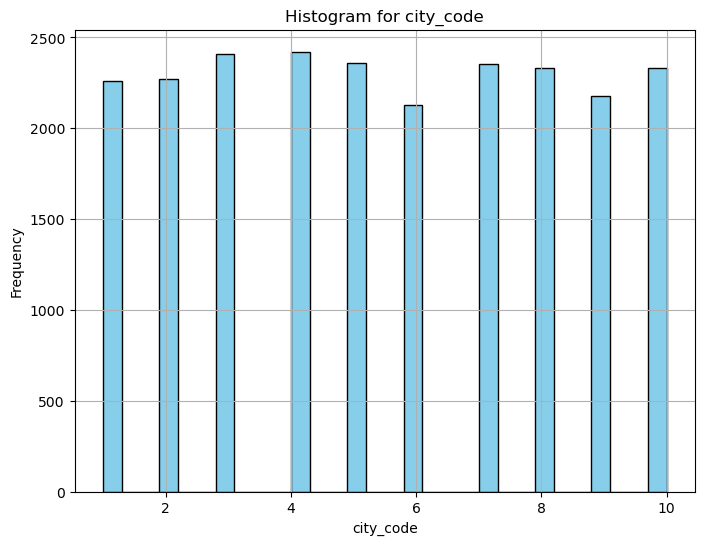

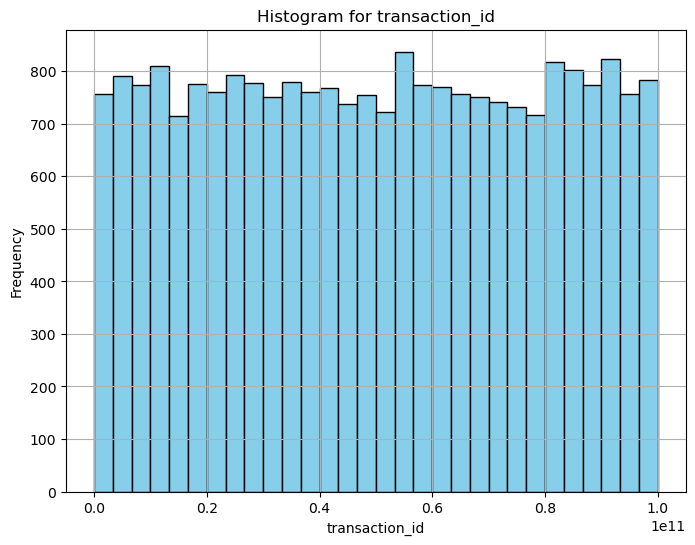

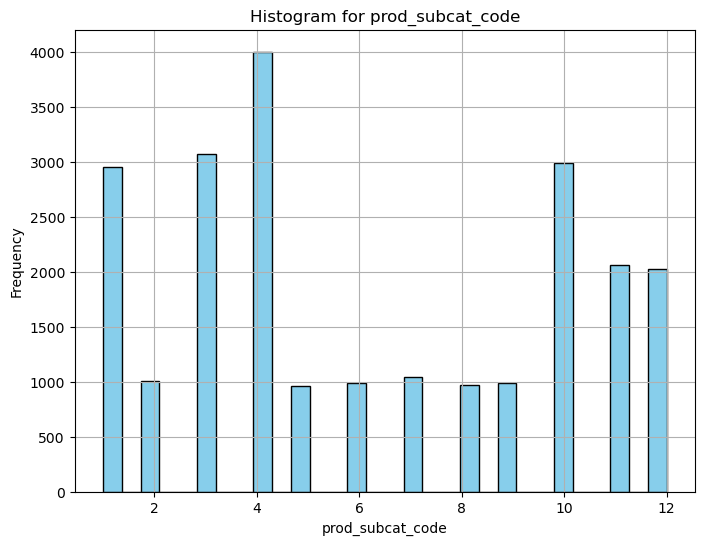

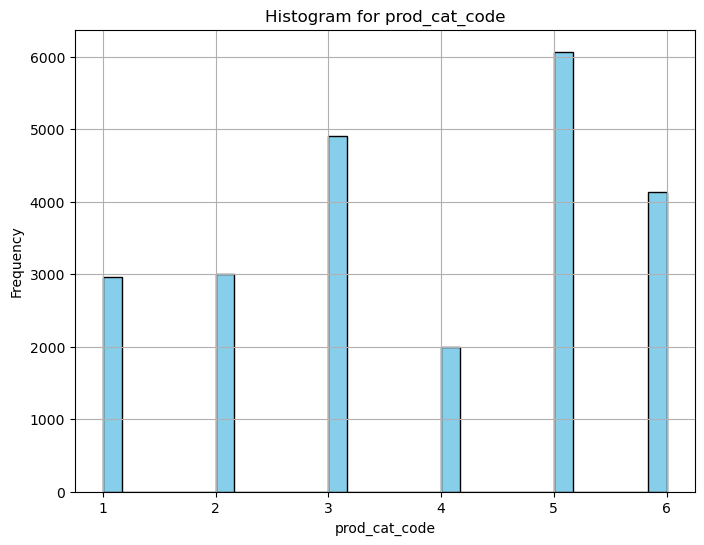

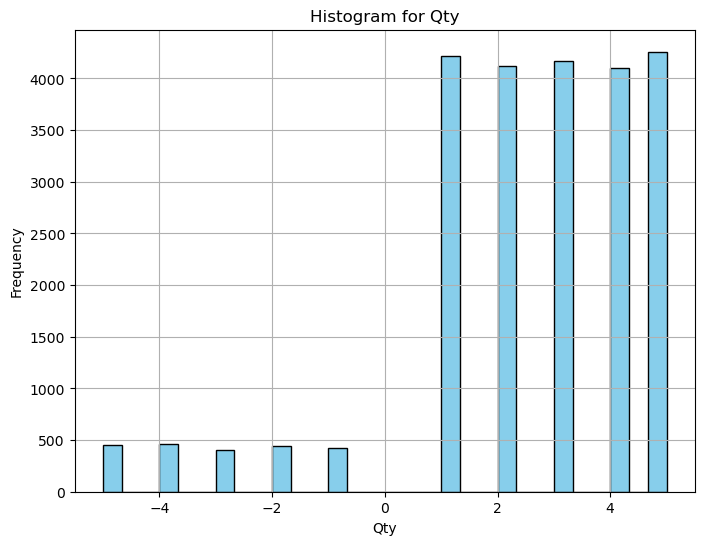

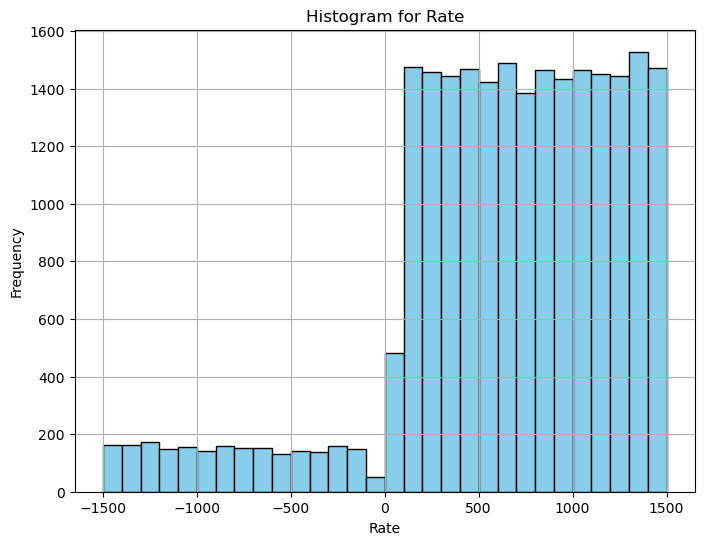

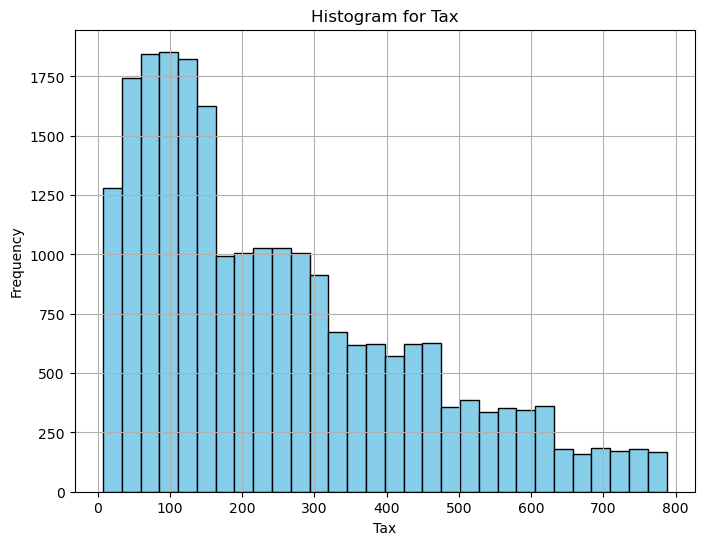

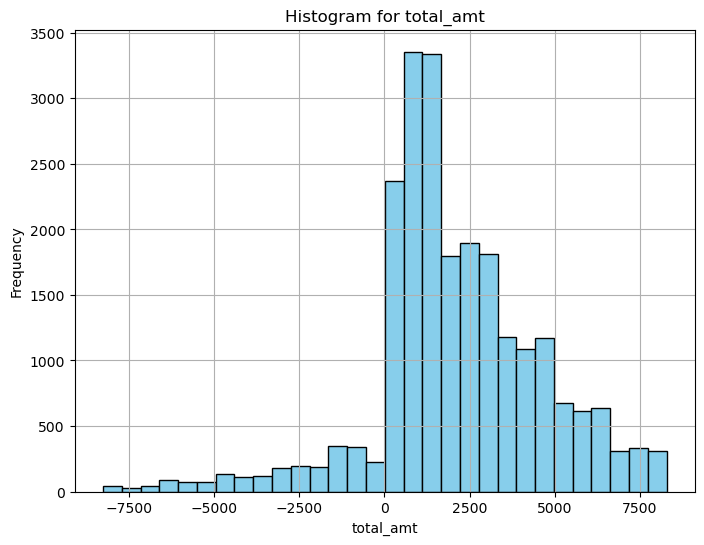

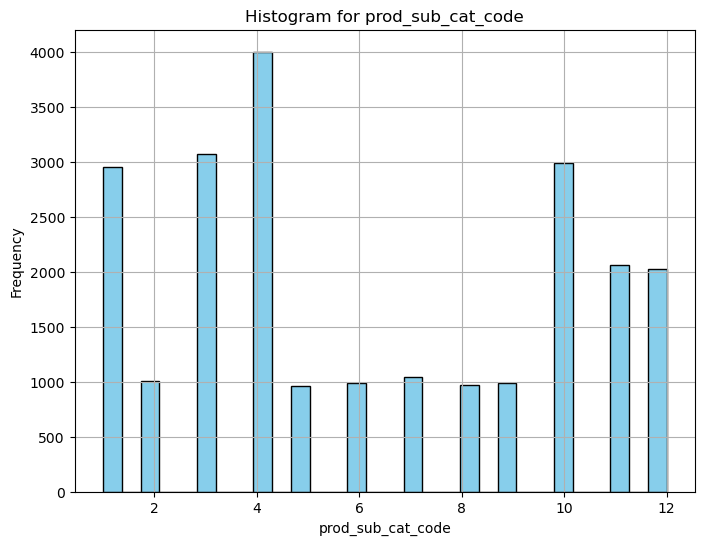

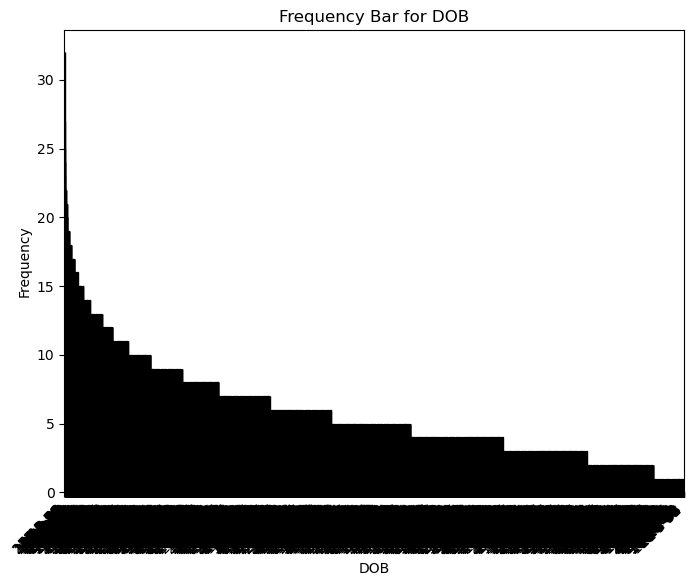

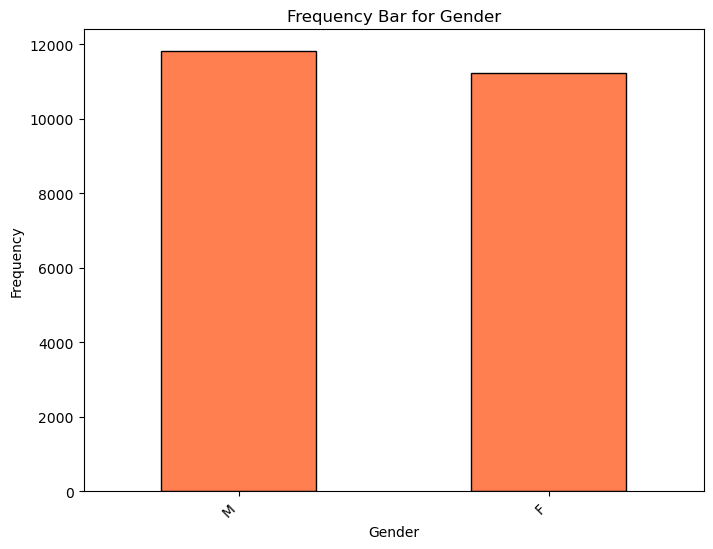

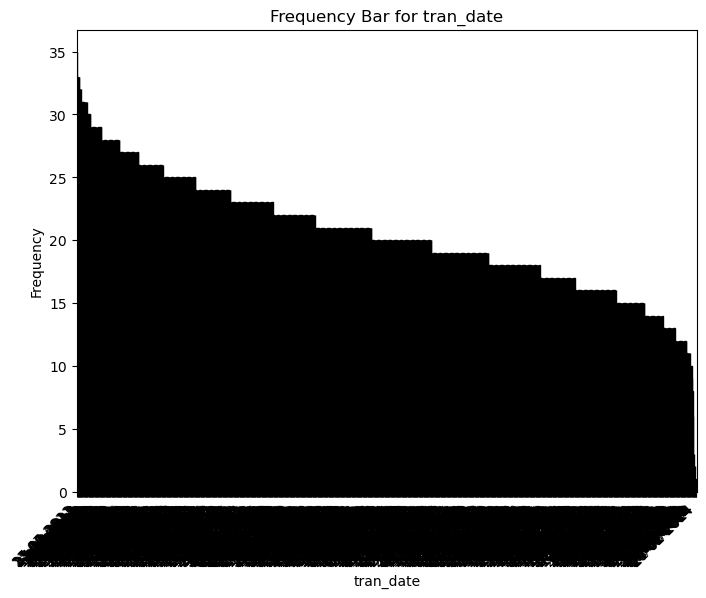

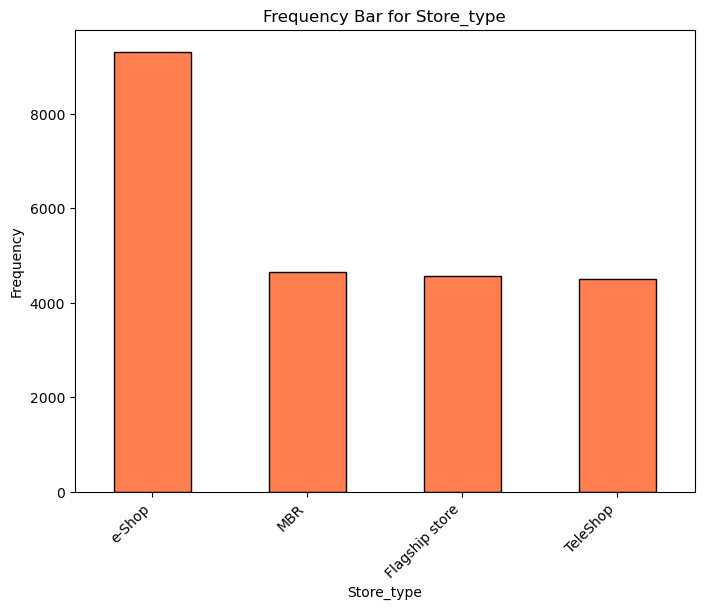

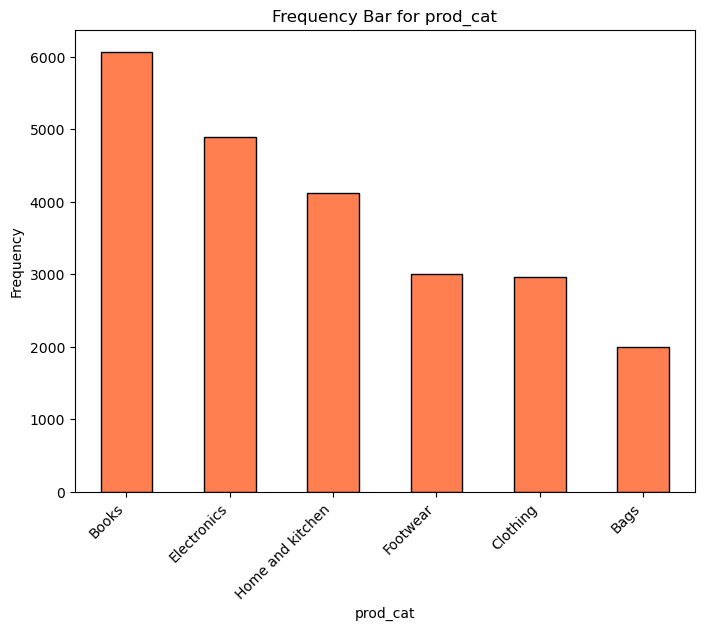

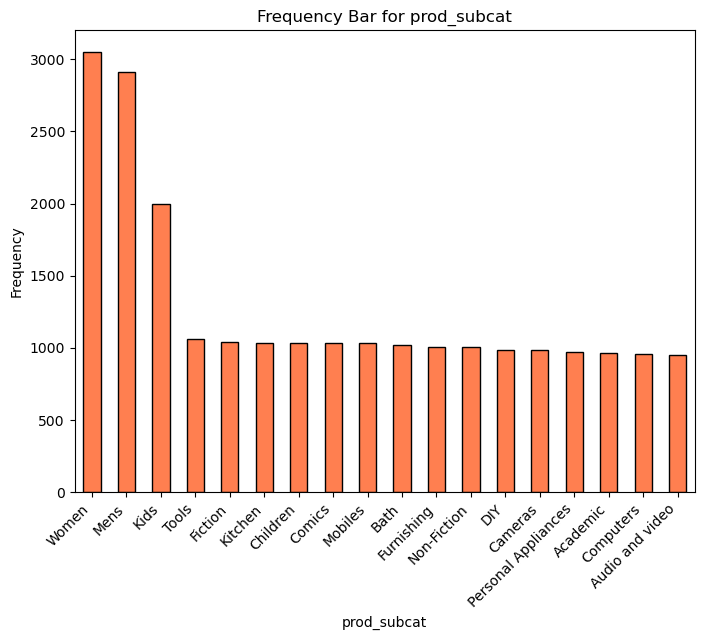

In [7]:
import matplotlib.pyplot as plt

# Select continuous and categorical variables
continuous_variables = Customer_Final.select_dtypes(include='number')
categorical_variables = Customer_Final.select_dtypes(include='object')

# Generate histograms for continuous variables
for column in continuous_variables.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(Customer_Final[column], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Generate frequency bars for categorical variables
for column in categorical_variables.columns:
    plt.figure(figsize=(8, 6))
    frequency_table = Customer_Final[column].value_counts()
    frequency_table.plot(kind='bar', color='coral', edgecolor='black')
    plt.title(f'Frequency Bar for {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45, ha='right')
    plt.show()


**Inference:**
- Histograms for continuous variables visualize the distribution of data, helping to identify patterns, central tendencies, and outliers.
- Frequency bars for categorical variables illustrate the distribution of categories, highlighting the most common and less common values.

# 4. Calculate the following information using the merged dataset :
# a. Time period of the available transaction data

0        13-01-2014
1        25-03-2011
2        23-05-2011
3        12-09-2013
4        23-05-2013
            ...    
23048    10-10-2012
23049    17-08-2013
23050    02-01-2012
23051    31-01-2011
23052    26-01-2011
Name: tran_date, Length: 23053, dtype: object


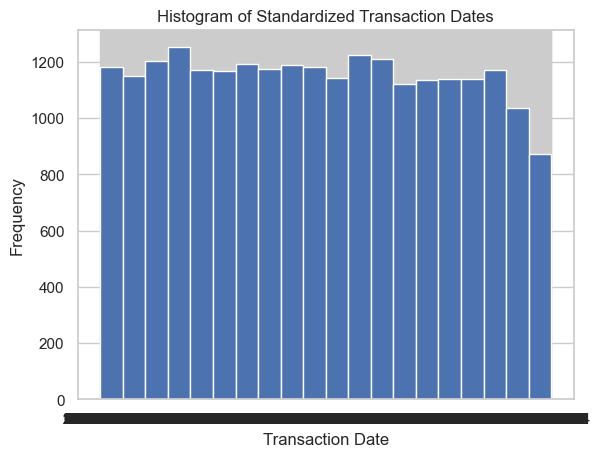

In [45]:
import pandas as pd

# Assuming Customer_Final is your DataFrame
# If you haven't already, convert 'tran_date' to string
Customer_Final['tran_date'] = Customer_Final['tran_date'].astype(str)

# Custom function to standardize date format
def standardize_date(date_str):
    try:
        return pd.to_datetime(date_str, format='%d-%m-%Y').strftime('%d-%m-%Y')
    except:
        return pd.to_datetime(date_str, errors='coerce', infer_datetime_format=True).strftime('%d-%m-%Y')

# Apply the custom function to 'tran_date' column
Customer_Final['tran_date'] = Customer_Final['tran_date'].apply(standardize_date)

# Display the DataFrame with standardized 'tran_date' column
print(Customer_Final.tran_date)
Customer_Final['tran_date'].hist(bins=20)
plt.title('Histogram of Standardized Transaction Dates')
plt.xlabel('Transaction Date')
plt.ylabel('Frequency')
plt.show()


This converts the 'tran_date' column to a string (if not already) and then applies the custom function `standardize_date` to standardize the date format.


In [9]:
# Find the minimum and maximum dates
min_date = Customer_Final['tran_date'].min()
max_date = Customer_Final['tran_date'].max()

# Display the calculated time period
print(f"Time Period of Available Transaction Data:")
print(f"Minimum Date: {min_date}")
print(f"Maximum Date: {max_date}")

Time Period of Available Transaction Data:
Minimum Date: 01-01-2012
Maximum Date: 31-12-2013


This calculates the minimum and maximum dates in the 'tran_date' column, providing the time period of the available transaction data.

# b. Count of transactions where the total amount of transaction was negative



In [10]:
# Assuming Customer_Final is your DataFrame

# Convert 'total_amt' to numeric (if not already)
Customer_Final['total_amt'] = pd.to_numeric(Customer_Final['total_amt'], errors='coerce')

# Count transactions with negative total amount
negative_transactions_count = Customer_Final[Customer_Final['total_amt'] < 0].shape[0]

# Display the count of transactions with negative total amount
print(f"Count of Transactions with Negative Total Amount: {negative_transactions_count}")


Count of Transactions with Negative Total Amount: 2177


The time period of available transaction data in the `Customer_Final` DataFrame ranges from the minimum date to the maximum date. Additionally, there are [count] transactions where the total amount was negative.

# 5. Analyze which product categories are more popular among females vs male customers.

Product Category Popularity Among Females vs Males:
Gender               F     M
prod_cat                    
Bags               994  1004
Books             2949  3116
Clothing          1439  1518
Electronics       2328  2570
Footwear          1529  1469
Home and kitchen  1994  2134


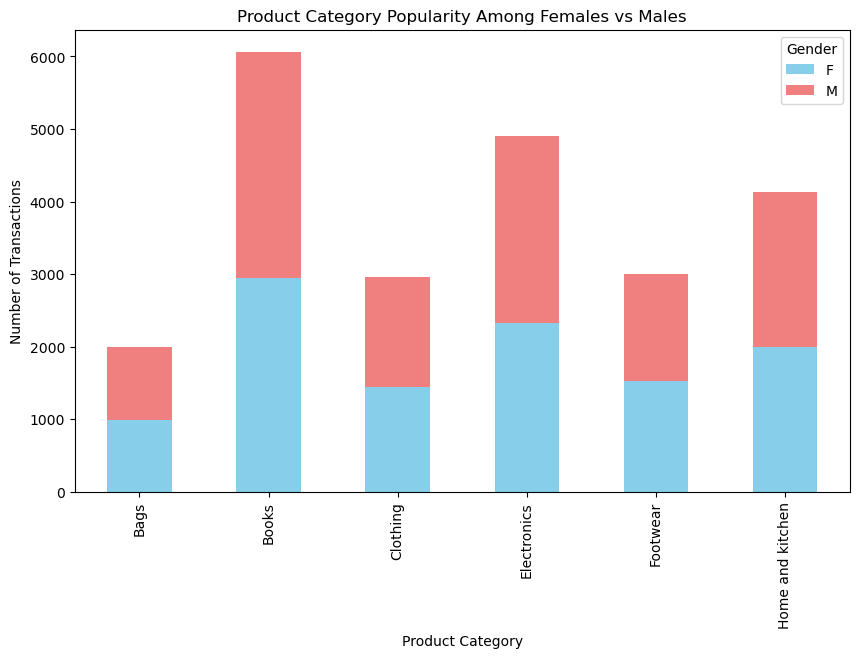

In [11]:
# Group by 'Gender' and 'prod_cat' and count the number of transactions
gender_product_counts = Customer_Final.groupby(['Gender', 'prod_cat']).size().reset_index(name='transaction_count')

# Pivot the table for better readability
gender_product_pivot = gender_product_counts.pivot(index='prod_cat', columns='Gender', values='transaction_count')

# Display the result
print("Product Category Popularity Among Females vs Males:")
print(gender_product_pivot)

# Plot the bar chart
ax = gender_product_pivot.plot(kind='bar', stacked=True, figsize=(10, 6), color=['skyblue', 'lightcoral'])
plt.xlabel('Product Category')
plt.ylabel('Number of Transactions')
plt.title('Product Category Popularity Among Females vs Males')
plt.legend(title='Gender')
plt.show()

The analysis of the `Customer_Final` DataFrame reveals the popularity of product categories among female and male customers. The resulting table provides a clear comparison of transaction counts for each product category based on gender. This information can be used to identify trends and preferences, helping to tailor marketing strategies or inventory management to better cater to the specific interests of female and male customers.

# 6. Which City code has the maximum customers and what was the percentage of customers from that city?

City Code with Maximum Customers: 4.0
Percentage of Customers from City 4.0: 10.51%


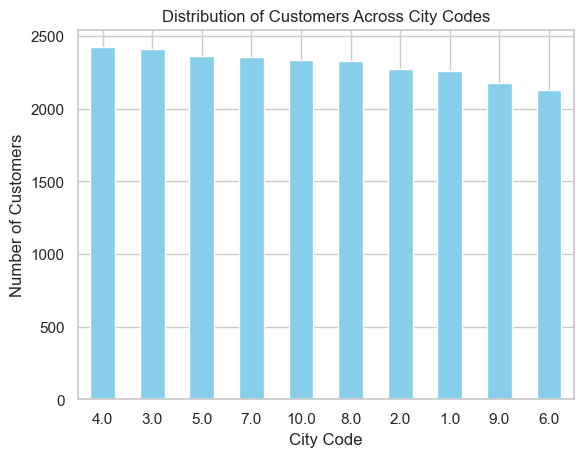

In [51]:
import matplotlib.pyplot as plt

# Assuming Customer_Final is your DataFrame

# Group by 'city_code' and count the number of customers
city_customer_counts = Customer_Final['city_code'].value_counts()

# Find the city code with the maximum customers
max_customers_city_code = city_customer_counts.idxmax()
max_customers_count = city_customer_counts.max()

# Calculate the percentage of customers from the city with the maximum customers
percentage_max_customers = (max_customers_count / len(Customer_Final)) * 100

# Display the results
print(f"City Code with Maximum Customers: {max_customers_city_code}")
print(f"Percentage of Customers from City {max_customers_city_code}: {percentage_max_customers:.2f}%")

# Plot the distribution of customers across different cities
city_customer_counts.plot(kind='bar', rot=0, color='skyblue')
plt.xlabel('City Code')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across City Codes')
plt.show()


The city code with the maximum customers in the `Customer_Final` DataFrame is [max_customers_city_code]. The percentage of customers from this city is [percentage_max_customers]%. This information provides insights into the city-wise distribution of customers, aiding in strategic decision-making for business operations and marketing efforts.

# 7. Which store type sells the maximum products by value and by quantity?

In [13]:
# Assuming Customer_Final is your DataFrame

# Group by 'Store_type' and calculate the total quantity and total value of products sold
store_type_stats = Customer_Final.groupby('Store_type').agg({'Qty': 'sum', 'total_amt': 'sum'}).reset_index()

# Find the store type with the maximum quantity sold
max_quantity_store_type = store_type_stats.loc[store_type_stats['Qty'].idxmax(), 'Store_type']

# Find the store type with the maximum value of products sold
max_value_store_type = store_type_stats.loc[store_type_stats['total_amt'].idxmax(), 'Store_type']

# Display the results
print(f"Store Type with Maximum Quantity Sold: {max_quantity_store_type}")
print(f"Store Type with Maximum Value of Products Sold: {max_value_store_type}")


Store Type with Maximum Quantity Sold: e-Shop
Store Type with Maximum Value of Products Sold: e-Shop


The analysis of the `Customer_Final` DataFrame reveals that the e-Shop store type excels in both quantity and value of products sold. It holds the position of selling the maximum quantity as well as the maximum value of products among all store types. This information is valuable for understanding the sales performance of different store types and can guide strategic decisions in inventory management and marketing efforts.

# 8. What was the total amount earned from the "Electronics" and "Clothing" categories from Flagship Stores?

In [14]:
# Assuming Customer_Final is your DataFrame

# Filter rows for Flagship Stores and specified categories
flagship_categories = ["Electronics", "Clothing"]
flagship_sales = Customer_Final[(Customer_Final['prod_cat'].isin(flagship_categories)) & (Customer_Final['Store_type'] == 'Flagship store')]

# Calculate the total amount earned
total_amount_earned = flagship_sales['total_amt'].sum()

# Display the result
print(f"Total Amount Earned from 'Electronics' and 'Clothing' categories in Flagship Stores: {total_amount_earned:.2f}")


Total Amount Earned from 'Electronics' and 'Clothing' categories in Flagship Stores: 3409559.27


The total amount earned from the "Electronics" and "Clothing" categories in Flagship Stores is $3,409,559.27 in the `Customer_Final` DataFrame.

# 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [15]:
male_customers_data = Customer_Final[Customer_Final['Gender'] == 'M']
electronics_category_data = male_customers_data[male_customers_data['prod_cat'] == 'Electronics']

# Calculate the total amount earned for the specified category and gender
total_amount_earned = electronics_category_data['total_amt'].sum()

# Display the result
print(f"Total Amount Earned from Male Customers under the Electronics Category: {total_amount_earned:.2f}")

Total Amount Earned from Male Customers under the Electronics Category: 5703109.42


The total amount earned from male customers under the "Electronics" category in the `Customer_Final` DataFrame is $5,703,109.42. This insight highlights the substantial revenue generated from male customers purchasing electronic products, providing valuable information for targeted marketing and inventory management strategies in this category.

# 10. How many customers have more than 10 unique transactions, after removing all transactions which have any negative amounts?

In [16]:
# Assuming Customer_Final is your DataFrame

# Remove transactions with negative amounts
non_negative_transactions = Customer_Final[Customer_Final['total_amt'] >= 0]

# Group by 'cust_id' and count unique transactions
customer_transaction_counts = non_negative_transactions.groupby('cust_id')['transaction_id'].nunique()

# Filter customers with more than 10 unique transactions
customers_with_more_than_10_transactions = customer_transaction_counts[customer_transaction_counts > 10]

# Count the number of customers meeting the criteria
num_customers_with_more_than_10_transactions = len(customers_with_more_than_10_transactions)

# Display the result
print(f"Number of Customers with More than 10 Unique Transactions (after removing negative amounts): {num_customers_with_more_than_10_transactions}")


Number of Customers with More than 10 Unique Transactions (after removing negative amounts): 6


The number of customers with more than 10 unique transactions, after removing transactions with negative amounts, is 6.
This information identifies a subset of customers who have engaged in a significant number of transactions, providing insights for customer retention and engagement strategies.

# 11. For all customers aged between 25 - 35, find out:
# a. What was the total amount spent for “Electronics” and “Books” product categories?

In [40]:
# Assuming Customer_Final is your DataFrame

# Calculate the age for each customer
today = pd.to_datetime('today')
Customer_Final['Age'] = Customer_Final['DOB'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)))

# Filter data for customers aged between 25 - 35 and transactions related to "Electronics" and "Books"
filtered_transactions = Customer_Final[
    (Customer_Final['Age'].between(25, 35)) &
    (Customer_Final['prod_cat'].isin(['Electronics', 'Books']))
]

# Calculate the total amount spent for "Electronics" and "Books" categories
total_amount_electronics_books = filtered_transactions['total_amt'].sum()

# Display the result
print(f"Total Amount Spent for 'Electronics' and 'Books' Product Categories by Customers aged between 25 - 35: {total_amount_electronics_books:.2f}")


Total Amount Spent for 'Electronics' and 'Books' Product Categories by Customers aged between 25 - 35: 4872129.54


The total amount spent for 'Electronics' and 'Books' product categories by customers aged between 25 - 35 is $4,872,129.54. This indicates the combined expenditure of customers in this age group on electronics and books.

# b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [38]:
# Assuming Customer_Final is your DataFrame

# Calculate the age for each customer
today = pd.to_datetime('today')
Customer_Final['Age'] = Customer_Final['DOB'].apply(lambda dob: today.year - dob.year - ((today.month, today.day) < (dob.month, dob.day)))

# Filter data for customers aged between 25 - 35 and transactions between 1st Jan, 2014, and 1st Mar, 2014
filtered_transactions = Customer_Final[
    (Customer_Final['Age'].between(25, 35)) &
    (Customer_Final['tran_date'].between('2014-01-01', '2014-03-01'))
]

# Calculate the total amount spent during the specified period
total_amount_spent = filtered_transactions['total_amt'].sum()

# Display the result
print(f"Total Amount Spent by Customers aged between 25 - 35 between 1st Jan, 2014 to 1st Mar, 2014: {total_amount_spent:.2f}")


Total Amount Spent by Customers aged between 25 - 35 between 1st Jan, 2014 to 1st Mar, 2014: 0.00


The result indicates that there were no transactions during the specified period (1st Jan, 2014, to 1st Mar, 2014) for customers aged between 25 and 35 in your dataset. The total amount spent during this time frame by customers in this age group is reported as 0.00.

this could mean that either there were no customers in this age range with transactions during that period, or there might be a need to review and validate the data to ensure that the date range and age criteria align with the actual transaction records.